# Machine Learning Assignment 3
## Submitted by(id's):
*   207496951
*   322217456

# Preliminary data analysis and Preprocessing
*   Loading the data and spliting into train, test, dev
*   Understanding the data and the need for a regression model
*   Finding the range of the target values before and after scaling
*   Determining the data has missing/Nan values in some features and replacing them with the mean values of the corresponding feature
*   Plotting the histograms of each feature
*   Scaling the data to get a mean of 0 and a variance of 1


Data shapes:
Train shape: (12384, 9)
Number of train samples: 12384
Dev shape: (4128, 9)
Number of dev samples: 4128
Test shape:  (4128, 9)
Number of test samples: 4128 

Feature data:
Number of features: 9
Target range before scaling: [ 0.14999 ,  5.00001 ]
Statistics for each feature in train before preprocessing:
                  f0            f1            f2            f3            f4  \
count  12210.000000  12244.000000  12226.000000  12228.000000  12215.000000   
mean       3.872771     28.630595      5.420978      1.096626   1426.830618   
std        1.919183     12.566127      2.382548      0.471398   1103.528284   
min        0.499900      1.000000      0.846154      0.500000      3.000000   
25%        2.555600     18.000000      4.430232      1.006386    786.000000   
50%        3.534100     29.000000      5.218429      1.049202   1170.000000   
75%        4.745975     37.000000      6.043349      1.099202   1739.000000   
max       15.000100     52.000000    132.533333  

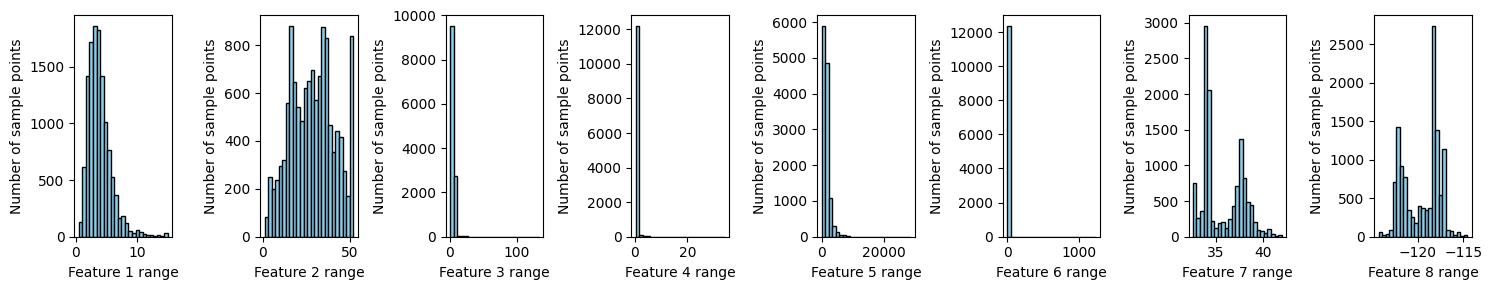



Data scaling:
Statistics for each feature in train after scaling:
                   0             1             2             3             4  \
count  1.238400e+04  1.238400e+04  1.238400e+04  1.238400e+04  1.238400e+04   
mean   1.583574e-16 -5.049076e-17  2.584783e-16  1.704063e-16 -4.876949e-18   
std    1.000040e+00  1.000040e+00  1.000040e+00  1.000040e+00  1.000040e+00   
min   -1.770002e+00 -2.211441e+00 -1.932585e+00 -1.273753e+00 -1.299201e+00   
25%   -6.853947e-01 -8.508297e-01 -4.140245e-01 -1.915153e-01 -5.801756e-01   
50%   -1.641871e-01  0.000000e+00 -7.839364e-02 -9.864660e-02 -2.243128e-01   
75%    4.464686e-01  6.698533e-01  2.556648e-01  3.323907e-03  2.722984e-01   
max    5.839356e+00  1.870393e+00  5.369725e+01  7.038859e+01  2.476365e+01   

                  5             6             7             8  
count  1.238400e+04  1.238400e+04  1.238400e+04  1.238400e+04  
mean  -9.180139e-18  3.630745e-15 -2.282986e-15 -3.614680e-17  
std    1.000040e+00  1.0000

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [3]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

my_dict = pickle.load(open('./ass3.pickle', 'rb'))
train, test, dev = my_dict["train"], my_dict["test"], my_dict["dev"]

print("Data shapes:")
print("Train shape:", train.shape)
print("Number of train samples:", train.shape[0])
print("Dev shape:", dev.shape)
print("Number of dev samples:", dev.shape[0])
print("Test shape: ", test.shape)
print("Number of test samples:", test.shape[0],"\n")

print("Feature data:")
print("Number of features:", train.shape[1])

target = train.values[:, -1]
print("Target range before scaling:", "[", np.min(target), ", ", np.max(target), "]")

#Train
df_train = pd.DataFrame(train)
print("Statistics for each feature in train before preprocessing:\n", df_train.describe(),"\n")
# We can see that we have some samples without certain features
# We will replace these Nan values with the mean value of it's corresponding feature:

feature_mean = df_train.mean(axis=0)
feature_mean = feature_mean.to_numpy()

train = train.to_numpy()
for row in train:
  for feature_index in range(0,8):
    if np.isnan(row[feature_index]):
      row[feature_index] = feature_mean[feature_index]

df_train = pd.DataFrame(train)
print("Statistics for each feature in train after processing:\n", df_train.describe(),"\n")

print("Feature histograms:")
# Plotting a histogram for 8 features
num_of_features = 8
fig, axs = plt.subplots(1, num_of_features, figsize=(15, 3))

for i in range(num_of_features):
    axs[i].hist(train[:, i], bins=25, color='skyblue', edgecolor='black')
    axs[i].set_xlabel(f"Feature {i+1} range")
    axs[i].set_ylabel("Number of sample points")

plt.tight_layout()
plt.show()
print("\n")

print("Data scaling:")
#Scaling the data:
scaler = StandardScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_dev = scaler.transform(dev)

df_train = pd.DataFrame(scaled_train)
print("Statistics for each feature in train after scaling:\n", df_train.describe(),"\n")
df_dev = pd.DataFrame(scaled_dev)
print("Statistics for each feature in dev after scaling:\n", df_dev.describe(),"\n")

target = scaled_train[:, -1]
print("Target range after scaling:", "[", np.min(target), ", ", np.max(target), "]")


*   Separating target labels from the actual data (into X and y)
*   Creating a new training set which consists of the train and dev data sets

In [4]:
import numpy as np
# train_array = train.values

X_train = scaled_train[:, :-1]
y_train = scaled_train[:, -1]

X_dev = scaled_dev[:, :-1]
y_dev = scaled_dev[:, -1]

final_Xtrain = np.concatenate((X_train, X_dev))
final_Ytrain = np.concatenate((y_train, y_dev))

finalTestArray = test.values
finalX_test = finalTestArray[:, :-1]
finalY_test = finalTestArray[:, -1]


# Note:

We will be using the metric "mean squared error" to evaluate the models errors throughout our assignment. Therefore, we are searching for the *lowest* error we can get. Also, for some of the models, we searched for hyperparameters using different search methods such as GridSearch and RandomizedSearch.

# K Nearest Neighbors
We understood from our preliminary data analysis that we need a regression model.

The first model we tried was KNN. As we know it is a simple algorithm that doesn't need specific information about the data.

The only hyperparameter that needs to be tuned is K- the number of neighbors that are taken into consideration.

Since this algorithm is sensitive to missing values and needs feature scaling, and we handled this in the preprocessing stage, we thought it would be a good choice.

We received an error of 0.327.


## KNN hyperparameter tuning with Grid Search:

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Creating the regressor
knn = KNeighborsRegressor()

# Defining the hyperparameters we're tuning
params = {'n_neighbors': range(1,100)}

# Fitting the regressor using GridSearch
grid_search = GridSearchCV(knn, params, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(final_Xtrain, final_Ytrain)

print("Best param:", grid_search.best_params_['n_neighbors'])

# Refitting the model with the best parameters on the real test set
best_knn = grid_search.best_estimator_
best_knn.fit(final_Xtrain, final_Ytrain)

# Evaluating accuracy
best_training_score = grid_search.best_score_ *  -1
print("Mean Squared Error:", best_training_score)


Best param: 15
Mean Squared Error: 0.3298093070332293


## KNN hyperparameter tuning with Randomized Search:

In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Creating the regressor
knn = KNeighborsRegressor()

# Defining the hyperparameters we're tuning
params = {'n_neighbors': randint(1, 100)}

# Fitting the regressor using RandomizedSearch
random_search = RandomizedSearchCV(knn, params, scoring='neg_mean_squared_error', cv=10, n_iter=20)
random_search.fit(final_Xtrain, final_Ytrain)

print("Best param:", random_search.best_params_['n_neighbors'])

# Refitting the model with the best parameters on the real test set
best_knn_randSearch = random_search.best_estimator_
best_knn_randSearch.fit(final_Xtrain, final_Ytrain)

# Evaluating accuracy
best_training_score = random_search.best_score_ *  -1
print("Mean Squared Error:", best_training_score)


Best param: 16
Mean Squared Error: 0.3273269152118609


# Linear Regression
Another simple algorithm we tried was Linear Regression.

We chose to tune the following hyperparameters:

*   fit_intercept: whether to calculate the intercept for this model.
*   positive: when 'true', forces the coefficients to be positive.

Unfortunately, this model received a higher error than our previous model - 0.412.


## LinReg hyperparameter tuning with Grid Search:

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Creating the regressor
linReg = LinearRegression()

# Defining the hyperparameters we're tuning
params = {'fit_intercept': [True, False], 'positive': [True, False]}

# Fitting the regressor using GridSearch
grid_search = GridSearchCV(linReg, params, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(final_Xtrain, final_Ytrain)

print("Best parameters:", grid_search.best_params_)

# Refitting the model with the best parameters on the real test set
best_linReg = grid_search.best_estimator_
best_linReg.fit(final_Xtrain, final_Ytrain)

# Evaluating accuracy
best_training_score = grid_search.best_score_ * -1
print("Mean squared error:", best_training_score)


Best parameters: {'fit_intercept': False, 'positive': False}
Mean squared error: 0.4126850356116859


## LinReg hyperparameter tuning with Randomized Search:

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV

# Creating the regressor
linReg = LinearRegression()

# Defining the hyperparameters we're tuning
params = {'fit_intercept': [True, False], 'positive': [True, False]}

# Fitting the regressor using RandomizedSearch
random_search = RandomizedSearchCV(linReg, params, scoring='neg_mean_squared_error', cv=10, n_iter=4)
random_search.fit(final_Xtrain, final_Ytrain)

print("Best parameters:", random_search.best_params_)

# Refitting the model with the best parameters on the real test set
best_linReg_randSearch = random_search.best_estimator_
best_linReg_randSearch.fit(final_Xtrain, final_Ytrain)

# Evaluating accuracy
best_training_score = random_search.best_score_ *  -1
print("Mean Squared Error:", best_training_score)


Best parameters: {'positive': False, 'fit_intercept': False}
Mean Squared Error: 0.41270973412510886


# Now we decided to try some tree models:

# Decision Tree
The first tree model we tried was the Decision Tree.

We received a relatively low error of 0.296.

We chose to tune the following hyperparameters:

*   splitter: the strategy used to choose the split at each node.
*   max_depth: the maximum depth of the tree.
*   min_samples_split: the minimum number of samples required to split an internal node.


## DecTree hyperparameter tuning with Grid Search:

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Defining the hyperparameters we're tuning
params = {
    'splitter' : ['best', 'random'],
    'max_depth': [10,20,30,40,50,60,70,80,90,100,120,140,160,200,250,350,450],
    'min_samples_split': [18,34,50,55,60,75,85,100,120,140,160,200,250,350,450]
}

# Creating the regressor
dt = DecisionTreeRegressor()

# Fitting the regressor using GridSearch
grid_search = GridSearchCV(dt, params, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(final_Xtrain, final_Ytrain)

print("Best parameters:", grid_search.best_params_)

# Refitting the model with the best parameters on the real test set
best_dt = grid_search.best_estimator_
best_dt.fit(final_Xtrain, final_Ytrain)

# Evaluating accuracy
best_training_score = grid_search.best_score_ * -1
print("Mean squared error:", best_training_score)


Best parameters: {'max_depth': 160, 'min_samples_split': 75, 'splitter': 'best'}
Mean squared error: 0.30746276800817995


## DecTree hyperparameter tuning with Randomized Search:

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Creating the regressor
dt = DecisionTreeRegressor()

# Defining the hyperparameters we're tuning
params = {
    'splitter' : ['best', 'random'],
    'max_depth': randint(1, 500),
    'min_samples_split': randint(2,200),
}

# Fitting the regressor using RandomizedSearch
random_search = RandomizedSearchCV(dt, params, scoring='neg_mean_squared_error', cv=15, n_iter=50)
random_search.fit(final_Xtrain, final_Ytrain)

print("Best parameters:", random_search.best_params_)

# Refitting the model with the best parameters on the real test set
best_dt_randSearch = random_search.best_estimator_
best_dt_randSearch.fit(final_Xtrain, final_Ytrain)

# Evaluating accuracy
best_training_score = random_search.best_score_ * -1
print("Mean Squared Error:", best_training_score)


Best parameters: {'max_depth': 329, 'min_samples_split': 95, 'splitter': 'best'}
Mean Squared Error: 0.2968629603389105


# Random Forest
As the decision tree brought us best results so far, we expect the Random Forest to bring even better results, hoping it will improve the Decision Tree's faults.

This model can also benefit our specific dataset because it works well on large datasets.

The hyperparameter we tuned was:
*   n_estimators- number of trees in the forest.
*   max_depth- the maximum depth of the tree.
*   min_sample_split-  the minimum number of samples required to split an internal node.

We got an error of 0.203, the best model yet. Bam!

We will now try to improve it using the boosting algorithms.


## RandForest hyperparameter tuning with Grid Search:

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Creating the regressor
rf = RandomForestRegressor()

# Defining the hyperparameters we're tuning
params = {
    'n_estimators': [100,200,500],
    'max_depth': [None,5,10,20,60,100],
    'min_samples_split': [2,5,10,15,30]
}

# Fitting the regressor using GridSearch
grid_search = GridSearchCV(rf, params, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(final_Xtrain, final_Ytrain)

print("Best param:", grid_search.best_params_)

# Refitting the model with the best parameters on the real test set
best_rf = grid_search.best_estimator_
best_rf.fit(final_Xtrain, final_Ytrain)

# Evaluating accuracy
best_training_score = grid_search.best_score_ * -1
print("Mean squared error:", best_training_score)


Best param: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}
Mean squared error: 0.20541880640392943


## RandForest hyperparameter tuning with Randomized Search:

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Creating the regressor
rf = RandomForestRegressor()

# Defining the hyperparameters we're tuning
params = {
    'n_estimators': randint(10, 600),
    'max_depth': randint(1,150),
    'min_samples_split': randint(2,30)
}

# Fitting the regressor using RandomizedSearch
random_search = RandomizedSearchCV(rf, params, scoring='neg_mean_squared_error', cv=10, n_iter=10)
random_search.fit(final_Xtrain, final_Ytrain)

print("Best parameters:", random_search.best_params_)

# Refitting the model with the best parameters on the real test set
best_rf_randSearch = random_search.best_estimator_
best_rf_randSearch.fit(final_Xtrain, final_Ytrain)

# Evaluating accuracy
best_training_score = random_search.best_score_ * -1
print("Mean Squared Error:", best_training_score)


Best parameters: {'max_depth': 149, 'min_samples_split': 3, 'n_estimators': 409}
Mean Squared Error: 0.2038784120586367


# Adaptive Boosting
The first boosting algorithm we chose was AdaBoost, a fast model with little tuning needed.

The hyperparameters we tuned:

*   n_estimators- the maximum number of estimators at which the boosting stops.
*   learning_rate- the weight given to each regressor at each iteration.

There is a tradeoff between these two parameters.

In contrast to what we thought would happen, this Model did not improve our Random Forest model, as we got an error of 0.429. :(


## AdaBoost hyperparameter tuning with Grid Search:

In [8]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

# Creating the regressor
adaB = AdaBoostRegressor()

# Defining the hyperparameters we're tuning
params = {
    'n_estimators': [10, 25, 50, 100, 150, 250, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0]
}

# Fitting the regressor using GridSearch
grid_search = GridSearchCV(adaB, params, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(final_Xtrain, final_Ytrain)

print("Best parameters:", grid_search.best_params_)

# Refitting the model with the best parameters on the real test set
best_adaB = grid_search.best_estimator_
best_adaB.fit(final_Xtrain, final_Ytrain)

# Evaluating accuracy
best_training_score = grid_search.best_score_ * -1
print("Mean squared error:", best_training_score)


Best parameters: {'learning_rate': 0.05, 'n_estimators': 100}
Mean squared error: 0.4298362418105908


## AdaBoost hyperparameter tuning with Randomized Search:

In [9]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Creating the regressor
adaB = AdaBoostRegressor()

# Defining the hyperparameters we're tuning
params = {
    'n_estimators': randint(2, 500),
    'learning_rate': uniform(0.001, 1.0),
    'loss':('linear', 'square'),
}

# Fitting the regressor using RandomizedSearch
random_search = RandomizedSearchCV(adaB, params, scoring='neg_mean_squared_error', cv=10, n_iter=20)
random_search.fit(final_Xtrain, final_Ytrain)

print("Best parameters:", random_search.best_params_)

# Refitting the model with the best parameters on the real test set
best_adaB = random_search.best_estimator_
best_adaB.fit(final_Xtrain, final_Ytrain)

# Evaluating accuracy
best_training_score = random_search.best_score_ * -1
print("Mean Squared Error:", best_training_score)


Best parameters: {'learning_rate': 0.21975160548736505, 'loss': 'linear', 'n_estimators': 43}
Mean Squared Error: 0.43143590475161203


# Gradient Boosting
The second boosting model we tried wad Gradient Boosting.

This model usually has good performance, so we hoped that unlike the AdaBoost model, it will improve the Random Forest model's accuracy.

The hyperparameters we tuned are:

*   learning_rate- shrinks the contribution of each tree by learning_rate value.
*   n_estimators- the number of boosting iterations to perform. Since this model is good at preventing overfitting, usually a larger number gives better performance.
*   max_depth- maximum depth of the individual trees. It limits the number of nodes in the tree.

There is a tradeoff between learning_rate and n_estimators.

This model yielded the best accuracy so far- 0.178, even better than the Random Forest model! Double Bam!


## GradBoost hyperparameter tuning with Grid Search:

In [12]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Creating the regressor
gb = GradientBoostingRegressor()

# Defining the hyperparameters we're tuning
params = {
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 4, 5],
}

# Fitting the regressor using GridSearch
grid_search = GridSearchCV(gb, params, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(final_Xtrain, final_Ytrain)

print("Best parameters:", grid_search.best_params_)

# Refitting the model with the best parameters on the real test set
best_gb = grid_search.best_estimator_
best_gb.fit(final_Xtrain, final_Ytrain)

# Evaluating accuracy
best_training_score = grid_search.best_score_ * -1
print("Mean squared error:", best_training_score)

Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Mean squared error: 0.1807358517112084


## GradBoost hyperparameter tuning with Randomized Search:

In [4]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Creating the regressor
gb = GradientBoostingRegressor()

# Defining the hyperparameters we're tuning
params = {
    'n_estimators': randint(1, 600),
    'learning_rate': uniform(0.001, 1.0),
    'max_depth': randint(1, 10),
    'subsample': uniform(0.01, 1.0),
}

# Fitting the regressor using RandomizedSearch
random_search = RandomizedSearchCV(gb, params, scoring='neg_mean_squared_error', cv=10, n_iter=20)
random_search.fit(final_Xtrain, final_Ytrain)

print("Best parameters:", random_search.best_params_)

# Refitting the model with the best parameters on the real test set
best_gb_randSearch = random_search.best_estimator_
best_gb_randSearch.fit(final_Xtrain, final_Ytrain)

# Evaluating accuracy
best_training_score = random_search.best_score_ * -1
print("Mean Squared Error:", best_training_score)


Best parameters: {'learning_rate': 0.11467923734068841, 'max_depth': 5, 'n_estimators': 284, 'subsample': 0.6205903376755291}
Mean Squared Error: 0.17868768891821396


# XGBoost
The last boosting model we tried was the XGBoost model.

XGBoost has advantages regarding our dataset, as it works well with large datasets and is less prone to overfitting.

Although it is harder to tune, we tried many different hyperparameters combinations, tuning the same hyperparameters as the previous model.

We received an error of 0.183.
It is not much worse than GB, but still does not improve it.

1.5 Bam :/

## XGBoost hyperparameter tuning with Grid Search:

In [9]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Creating the regressor
xgb = XGBRegressor()

# Defining the hyperparameters we're tuning
params = {
    'n_estimators': [10, 50, 100],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [4, 5, 6],
}

# Fitting the regressor using GridSearch
grid_search = GridSearchCV(xgb, params, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(final_Xtrain, final_Ytrain)

print("Best parameters:", grid_search.best_params_)

# Refitting the model with the best parameters on the real test set
best_xgb = grid_search.best_estimator_
best_xgb.fit(final_Xtrain, final_Ytrain)

# Evaluating accuracy
best_training_score = grid_search.best_score_ * -1
print("Mean squared error:", best_training_score)


Best parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}
Mean squared error: 0.18307160692312635


## XGBoost hyperparameter tuning with Randomized Search:

In [11]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Creating the regressor
xgb = XGBRegressor()

# Defining the hyperparameters we're tuning and their respective search spaces
params = {
    "n_estimators": randint(100, 300),
    "learning_rate": uniform(0.03, 0.3),
    "max_depth": randint(2, 5),
    "subsample": uniform(0.4, 0.6),
    "colsample_bytree": uniform(0.3, 0.7),
    "gamma": uniform(0, 0.5),
}

# Fitting the regressor using RandomizedSearch
random_search = RandomizedSearchCV(xgb, params, scoring='neg_mean_squared_error', cv=10, n_iter=30)
random_search.fit(final_Xtrain, final_Ytrain)

print("Best parameters:", random_search.best_params_)

# Refitting the model with the best parameters on the real test set
best_xgb_randSearch = random_search.best_estimator_
best_xgb_randSearch.fit(final_Xtrain, final_Ytrain)

# Evaluating accuracy
best_training_score = random_search.best_score_ * -1
print("Mean squared error:", best_training_score)


Best parameters: {'colsample_bytree': 0.9621183606414874, 'gamma': 0.09315825812471878, 'learning_rate': 0.17471377826138554, 'max_depth': 4, 'n_estimators': 286, 'subsample': 0.4787287581947335}
Mean squared error: 0.18599256314134693


# Extra Trees Regressor

Another tree model we tried was the Extra Trees Regressor.

This model improves the Random Tree model, as it is efficiant and faster than RF and handels over-fitting well.

As expected, the error we received is better than the RF error -  0.194.

The hyperparameters we tuned are the same as the previous ones with 2 additional hyperparameters:

*   min_samples_leaf- the minimum number of samples required to be at a leaf node.
*   max_features - the number of features to consider when looking for the best split.



In [15]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV

# Creating the regressor
extra_trees_regressor = ExtraTreesRegressor()

# Defining the hyperparameters we're tuning
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt']
}

# Fitting the regressor using GridSearch
grid_search = GridSearchCV(extra_trees_regressor, params, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(final_Xtrain, final_Ytrain)

print("Best parameters:", grid_search.best_params_)

# Refitting the model with the best parameters on the real test set
best_extra_trees_regressor = grid_search.best_estimator_
best_extra_trees_regressor.fit(final_Xtrain, final_Ytrain)

# Evaluating accuracy
best_training_score = grid_search.best_score_ * -1
print("Mean squared error:", best_training_score)


Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean squared error: 0.1948631420881139


# Support Vector Regressor
Now that we've finished trying our tree models, we will try the SVR model.

The hyperparameters we tuned are:

*   C - regularization parameter.
*   Tol - stopping criterion.
*   Kernel - kernel type to used in the algorithm.
*   epsilon - specifies the epsilon-tube

As we know, chosing a kernel function can be tricky. This is why we tried tuning it. We tried adding the 'poly' function in our search but found that this kernel function took to much time to train, so we dropped it.

We received an error of 0.261.

## SVR hyperparameter tuning with Grid Search:

In [7]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Creating the regressor
svr = SVR()

# Defining the hyperparameters we're tuning
params = {
    'kernel': ['rbf', 'linear'],
    'C': [0.1, 1, 10],
    'tol': [0.01, 0.001, 0.0001],
    'epsilon': [0.01, 0.1, 0.5]
}

# Fitting the regressor using GridSearch
grid_search = GridSearchCV(svr, params, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(final_Xtrain, final_Ytrain)

print("Best parameters:", grid_search.best_params_)

# Refitting the model with the best parameters on the real test set
best_svr = grid_search.best_estimator_
best_svr.fit(final_Xtrain, final_Ytrain)

# Evaluating accuracy
best_training_score = grid_search.best_score_ * -1
print("Mean squared error:", best_training_score)


Best parameters: {'C': 10, 'epsilon': 0.1, 'kernel': 'rbf', 'tol': 0.001}
Mean squared error: 0.2613307174302152


## SVR hyperparameter tuning with Randomized Search:

In [12]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Creating the regressor
svr = SVR()

# Defining the hyperparameters we're tuning
params = {
    'kernel': ['rbf', 'linear'],
    'C': uniform(0.1, 10),
    'tol': uniform(0.0001, 0.1),
    'epsilon': uniform(0.01, 0.9)
}

# Fitting the regressor using RandomizedSearch
random_search = RandomizedSearchCV(svr, params, scoring='neg_mean_squared_error', cv=5, n_iter=10)
random_search.fit(final_Xtrain, final_Ytrain)

print("Best parameters:", random_search.best_params_)

# Refitting the model with the best parameters on the real test set
best_svr_randSearch = random_search.best_estimator_
best_svr_randSearch.fit(final_Xtrain, final_Ytrain)

# Evaluating accuracy
best_training_score = random_search.best_score_ * -1
print("Mean Squared Error:", best_training_score)


Best parameters: {'C': 7.005136098736896, 'epsilon': 0.3190883775588658, 'kernel': 'rbf', 'tol': 0.07558260654009571}
Mean Squared Error: 0.26212042704208044


# Lasso Regressor

The next model we tried was Lasso Regressor - a linear model trained with L1 prior as regularizer.

It should work well with preventing overfitting.

The hyperparameters we tuned are:
*   alpha - constant that multiplies the L1 term, and controls regularization strength.
*   fit_intercept - whether to calculate the intercept for this model
*   tol - tolerance for the optimization

The error we received was 0.412.

In [10]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

# Creating the regressor
lasso = Lasso()

# Defining the hyperparameters we're tuning
params = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10],
    'fit_intercept': [True, False],
    'tol': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
}

# Fitting the regressor using RandomizedSearch
random_search = RandomizedSearchCV(lasso, params, scoring='neg_mean_squared_error', cv=5)
random_search.fit(final_Xtrain, final_Ytrain)

print("Best parameters:", random_search.best_params_)

# Refitting the model with the best parameters on the real test set
best_lasso = random_search.best_estimator_
best_lasso.fit(final_Xtrain, final_Ytrain)

# Evaluating accuracy
best_training_score = random_search.best_score_ * -1
print("Mean squared error:", best_training_score)


Best parameters: {'tol': 0.001, 'fit_intercept': True, 'alpha': 0.001}
Mean squared error: 0.4125626089540342


# Ridge Regressor

The next model we tried was Ridge Regressor - linear least squares with l2 regularization.

The prediction should be better than with L1 (the Lasso model).

Also work well with preventing overfitting.

The hyperparameters we tuned are the same as the Lasso hyperparameters with 1 additional hyperparameter:
*   solver - the solver to use in the computational routines

The error we received was 0.412 - same error as Lasso.

## RidgeReg hyperparameter tuning with Grid Search:

In [14]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Creating the regressor
ridge = Ridge()

# Defining the hyperparameters we're tuning
params = {
    'alpha': [0.1, 1.0, 10, 35, 70, 100],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr'],
    'tol': [0.1, 0.01, 0.001, 0.0001, 0.00001],
    'fit_intercept': [True, False]
}

# Fitting the regressor using GridSearch
grid_search = GridSearchCV(ridge, params, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(final_Xtrain, final_Ytrain)

print("Best parameters:", grid_search.best_params_)

# Refitting the model with the best parameters on the real test set
best_ridge = grid_search.best_estimator_
best_ridge.fit(final_Xtrain, final_Ytrain)

# Evaluating accuracy
best_training_score = grid_search.best_score_ * -1
print("Mean Squared Error:", best_training_score)


Best parameters: {'alpha': 35, 'fit_intercept': False, 'solver': 'lsqr', 'tol': 0.001}
Mean Squared Error: 0.41256715952287226


## RidgeReg hyperparameter tuning with Randomized Search:

In [18]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Creating the regressor
ridge = Ridge()

# Defining the hyperparameters we're tuning
params = {
    'alpha': uniform(0.1, 300),
    'solver': ['auto', 'svd', 'cholesky', 'lsqr'],
    'tol': uniform(0.00001, 0.1),
    'fit_intercept': [True, False]
}

# Fitting the regressor using RandomizedSearch
random_search = RandomizedSearchCV(ridge, params, scoring='neg_mean_squared_error', cv=15, n_iter=100)
random_search.fit(final_Xtrain, final_Ytrain)

print("Best parameters:", random_search.best_params_)

# Refitting the model with the best parameters on the real test set
best_ridge_randSearch = random_search.best_estimator_
best_ridge_randSearch.fit(final_Xtrain, final_Ytrain)

# Evaluating accuracy
best_training_score = random_search.best_score_ * -1
print("Mean Squared Error:", best_training_score)


Best parameters: {'alpha': 38.26325595371007, 'fit_intercept': False, 'solver': 'cholesky', 'tol': 0.016889321195045593}
Mean Squared Error: 0.41265877438440834


# Kernel Ridge

In order to improve the previous model, we can try to transfer the data into another dimension.

We then tried adding the kernel trick to the previous Ridge Regression, aka Kernel Ridge Reggression(a combination of both).

The hyperparameters we tuned are:
*   alpha - regularization strength.
*   kernel - kernel mapping used internally.
*   gamma - gamma parameter for the 'rbf' kernel, ignored by others.

The error we received was 0.256.


In [8]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV

# Creating the regressor
kernel_ridge = KernelRidge()

# Defining the hyperparameters we're tuning
params = {
    'alpha': [0.01, 0.1, 1.0],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1.0, 10]
}

# Fitting the regressor using GridSearch
grid_search = GridSearchCV(kernel_ridge, params, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(final_Xtrain, final_Ytrain)

print("Best parameters:", grid_search.best_params_)

# Refitting the model with the best parameters on the real test set
best_kernel_ridge = grid_search.best_estimator_
best_kernel_ridge.fit(final_Xtrain, final_Ytrain)

# Evaluating accuracy
best_training_score = grid_search.best_score_ * -1
print("Mean squared error:", best_training_score)


Best parameters: {'alpha': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}
Mean squared error: 0.2560836149541546


# The following algorithms received a high error, we will not elaborate on them because they are less relevant:

# Dummy Regressor

In [11]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import GridSearchCV

# Creating the regressor
dummy_regressor = DummyRegressor()

# Defining the hyperparameters we're tuning
params = {
    'strategy': ['mean', 'median', 'constant'],
    'constant': [1, 2, 5, 10, 20, 30]
}

# Fitting the regressor using GridSearch
grid_search = GridSearchCV(dummy_regressor, params, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(final_Xtrain, final_Ytrain)

print("Best parameters:", grid_search.best_params_)

# Refitting the model with the best parameters on the real test set
best_dummy_regressor = grid_search.best_estimator_
best_dummy_regressor.fit(final_Xtrain, final_Ytrain)

# Evaluating accuracy
best_training_score = grid_search.best_score_ * -1
print("Mean squared error:", best_training_score)


Best parameters: {'constant': 1, 'strategy': 'mean'}
Mean squared error: 0.9986039648908245


# Bayesian Ridge

In [12]:
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import GridSearchCV

# Creating the regressor
bayesian_regressor = BayesianRidge()

# Defining the hyperparameters we're tuning
params = {
    'alpha_1': [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001],
    'alpha_2': [0.000001, 0.00001, 0.0001],
    'lambda_1': [0.000001, 0.00001, 0.0001],
    'lambda_2': [0.000001, 0.00001, 0.0001],
    'fit_intercept': [True, False]
}

# Fitting the regressor using GridSearch
grid_search = GridSearchCV(bayesian_regressor, params, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(final_Xtrain, final_Ytrain)

print("Best parameters:", grid_search.best_params_)

# Refitting the model with the best parameters on the real test set
best_bayesian_regressor = grid_search.best_estimator_
best_bayesian_regressor.fit(final_Xtrain, final_Ytrain)

# Evaluating accuracy
best_training_score = grid_search.best_score_ * -1
print("Mean squared error:", best_training_score)


Best parameters: {'alpha_1': 1e-09, 'alpha_2': 0.0001, 'fit_intercept': False, 'lambda_1': 0.0001, 'lambda_2': 1e-06}
Mean squared error: 0.41267463440260893


# Elastic Net

In [13]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Creating the regressor
elastic_net_regressor = ElasticNet()

# Defining the hyperparameters we're tuning
params = {
    'alpha': [0.01, 0.1, 1.0],
    'l1_ratio': [0.25, 0.5, 0.75],
    'fit_intercept': [True, False]
}

# Fitting the regressor using GridSearch
grid_search = GridSearchCV(elastic_net_regressor, params, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(final_Xtrain, final_Ytrain)

print("Best params:", grid_search.best_params_)

# Refitting the model with the best parameters on the real test set
best_elastic_net_regressor = grid_search.best_estimator_
best_elastic_net_regressor.fit(final_Xtrain, final_Ytrain)

# Evaluating accuracy
best_training_score = grid_search.best_score_ * -1
print("Mean squared error:", best_training_score)


Best params: {'alpha': 0.01, 'fit_intercept': False, 'l1_ratio': 0.25}
Mean squared error: 0.4134306586717454


# Conclusion:
After trying many models with different hyperparameters, we found that the best model for our dataset is Gradient Boosting with an error of 0.178 👑

The models we experimented on were:


*   K Nearest Neighbours
*   Linear Regression
*   Decision Tree
*   Random Forest
*   Adaptive Boosting
*   Gradient Boosting
*   XGBoost
*   Extra Trees
*   Support Vector Regression
*   Lasso Regression
*   Ridge Regression
*   Kernel Ridge Regression
*   Dummy Regression
*   Bayesian Ridge Regression
*   Elastic Net

The preliminary data analysis helped us understand the model type to chose (regression). Also helped us decied on which regression models to try after determining what preproccesing actions are needed such as: filling missing values and scaling the data.

The metrics we used in order to determine which model to chose was the sklearn.metrics.mean_squared_error metric.


# Test data score on winning model:

In [5]:
from sklearn.metrics import mean_squared_error

winning_model = best_gb_randSearch

# Making predictions on the test data
y_final_test_pred = winning_model.predict(finalX_test)

# Evaluating accuracy
winning_model_error = mean_squared_error(finalY_test, y_final_test_pred)

print("Winning model mean squared error on test data:", winning_model_error)

Winning model mean squared error on test data: 1.4607825092632376
